<a href="https://colab.research.google.com/github/Ianfm94/Financial_Analysis/blob/master/LSTM_Workings/Notebooks/LSTM_08_07_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing required packages
import pandas as pd
import numpy as np
from numpy import array
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from google.colab import  drive
drive.mount('/drive', force_remount=True)
print(tf.__version__)

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive
2.2.0


In [ ]:
# Reading in training and labels data

train = pd.read_csv('/drive/My Drive/MC_Returns.csv',
  index_col = 0)
train = pd.DataFrame(train)
labels = pd.read_csv('/drive/My Drive/MC_Labels.csv',
  index_col = 0)
labels = pd.DataFrame(labels)

# In the labels file 1 = Jump, 2 = Volatility

print(train.head(n=10))
print(train.shape)
print()
print(labels.head(n=10))
print(labels.shape)

train  = train.to_numpy()
labels  = labels.to_numpy()
np.random.seed(111)

# Splitting between train, validation and test data
x_train,x_valid,y_train,y_valid = train_test_split(train, labels,
    test_size=0.5, random_state=111)
print("Total number of training samples: ", x_train.shape)
print("Total number of validation samples: ", x_valid.shape)


          0         1         2  ...      3777      3778      3779
0  0.005824  0.006521  0.002107  ... -0.001619  0.025451  0.010385
1 -0.003144  0.002219 -0.013937  ...  0.004453  0.008430 -0.003478
2 -0.001346  0.007069 -0.009029  ... -0.004997  0.007036  0.007454
3  0.009150  0.006029  0.023164  ... -0.003687 -0.007572 -0.006406
4 -0.001343  0.003181  0.000788  ... -0.015124 -0.002524 -0.006273
5  0.003790 -0.001416 -0.006156  ... -0.005025  0.004864 -0.002624
6 -0.009727  0.008486  0.004078  ... -0.003194  0.002806 -0.004799
7  0.002192 -0.004939 -0.020410  ...  0.011621 -0.004050  0.004369
8 -0.013553  0.003475 -0.006632  ... -0.000227  0.020144  0.013834
9  0.012298  0.006251 -0.001306  ... -0.009151 -0.010332  0.007967

[10 rows x 3780 columns]
(2000, 3780)

   0  1  2  3  4  5  6  7  ...  3772  3773  3774  3775  3776  3777  3778  3779
0  2  2  2  2  2  2  2  2  ...     2     2     2     2     2     2     2     2
1  2  2  2  2  2  2  2  2  ...     2     2     2     2     2     

In [ ]:
# LSTM Workings
n_timesteps = 1

x_train = np.reshape(x_train, (3780, n_timesteps, 1000))
y_train = np.reshape(y_train, (3780, n_timesteps, 1000))

x_train = np.array(x_train)
y_train = np.array(y_train)

model = Sequential()
model.add(Bidirectional(LSTM(units=500, return_sequences = True, input_shape = (n_timesteps, 1000))))
model.add(Dropout(0.2))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
results = model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
3780/3780 [==============================] - 5s 1ms/step - loss: 14.8628 - accuracy: 0.0000e+00
Epoch 2/100
3780/3780 [==============================] - 2s 651us/step - loss: 12.7242 - accuracy: 0.0000e+00
Epoch 3/100
3780/3780 [==============================] - 2s 661us/step - loss: 12.0234 - accuracy: 0.0000e+00
Epoch 4/100
3780/3780 [==============================] - 2s 651us/step - loss: 11.4992 - accuracy: 0.0000e+00
Epoch 5/100
3780/3780 [==============================] - 2s 656us/step - loss: 11.0641 - accuracy: 0.0000e+00
Epoch 6/100
3780/3780 [==============================] - 3s 676us/step - loss: 10.7075 - accuracy: 0.0000e+00
Epoch 7/100
3780/3780 [==============================] - 2s 652us/step - loss: 10.3819 - accuracy: 0.0000e+00
Epoch 8/100
3780/3780 [==============================] - 2s 639us/step - loss: 10.0991 - accuracy: 0.0000e+00
Epoch 9/100
3780/3780 [==============================] - 2s 644us/step - loss: 9.8356 - accuracy: 0.0000e+00
Epoch 10/100


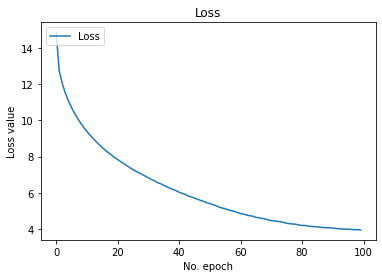

In [ ]:
plt.plot(results.history['loss'], label='Loss')

plt.title('Loss')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

Epoch 1/100
3780/3780 [==============================] - 6s 2ms/step - loss: 11.1832 - accuracy: 0.0000e+00
Epoch 2/100
3780/3780 [==============================] - 6s 1ms/step - loss: 5.7672 - accuracy: 1.0688e-04
Epoch 3/100
3780/3780 [==============================] - 6s 1ms/step - loss: 4.3411 - accuracy: 1.3333e-04
Epoch 4/100
3780/3780 [==============================] - 6s 1ms/step - loss: 3.9979 - accuracy: 1.2698e-04
Epoch 5/100
3780/3780 [==============================] - 6s 1ms/step - loss: 3.8895 - accuracy: 1.2804e-04
Epoch 6/100
3780/3780 [==============================] - 6s 1ms/step - loss: 3.8651 - accuracy: 1.2884e-04
Epoch 7/100
3780/3780 [==============================] - 6s 1ms/step - loss: 3.8464 - accuracy: 1.2884e-04
Epoch 8/100
3780/3780 [==============================] - 6s 1ms/step - loss: 3.8395 - accuracy: 1.3201e-04
Epoch 9/100
3780/3780 [==============================] - 6s 1ms/step - loss: 3.8327 - accuracy: 1.2963e-04
Epoch 10/100
3780/3780 [============

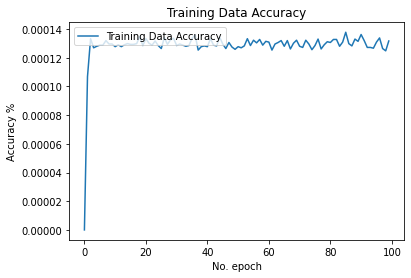

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 1, 2000)           16008000  
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 1000)           12004000  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 1000)           0         
Total params: 28,012,000
Trainable params: 28,012,000
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# LSTM Workings_2

n_timesteps = 1

x_train = np.reshape(x_train, (3780, n_timesteps, 1000))
y_train = np.reshape(y_train, (3780, n_timesteps, 1000))

x_train = np.array(x_train)
y_train = np.array(y_train)

model_1 = Sequential()
model_1.add(Bidirectional(LSTM(units=1000, return_sequences = True, input_shape = (n_timesteps, 1000))))
model_1.add(LSTM(1000, return_sequences = True))
model_1.add(Dropout(0.2))

model_1.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

results_1 = model_1.fit(x_train, y_train, epochs=100, batch_size=32)

plt.plot(results_1.history['accuracy'], label='Training Data Accuracy')

plt.title('Training Data Accuracy')
plt.ylabel('Accuracy %')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()
print(model_1.summary())

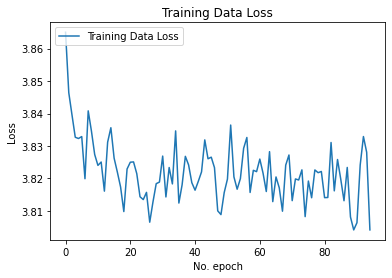

In [ ]:
plt.plot(results_1.history['loss'][5:], label='Training Data Loss')

plt.title('Training Data Loss')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# LSTM Workings_3

n_timesteps = 1

x_train = np.reshape(x_train, (3780, n_timesteps, 1000))
y_train = np.reshape(y_train, (3780, n_timesteps, 1000))

x_train = np.array(x_train)
y_train = np.array(y_train)

model_2 = Sequential()
model_2.add(Bidirectional(LSTM(units=1000, return_sequences = True, input_shape = (n_timesteps, 1000))))
model_2.add(LSTM(1000, return_sequences = True))
model_2.add(Dropout(0.2))

model_2.compile(loss='mse', optimizer="RMSprop", metrics=['accuracy'])

results_2 = model_2.fit(x_train, y_train, epochs=100, batch_size=32)

print(model_2.summary())

Epoch 1/100
3780/3780 [==============================] - 6s 2ms/step - loss: 2.2752 - accuracy: 0.0000e+00
Epoch 2/100
3780/3780 [==============================] - 5s 1ms/step - loss: 1.6805 - accuracy: 0.0000e+00
Epoch 3/100
3780/3780 [==============================] - 5s 1ms/step - loss: 1.6784 - accuracy: 0.0513
Epoch 4/100
3780/3780 [==============================] - 5s 1ms/step - loss: 1.6791 - accuracy: 0.5635
Epoch 5/100
3780/3780 [==============================] - 5s 1ms/step - loss: 1.6774 - accuracy: 0.6238
Epoch 6/100
3780/3780 [==============================] - 5s 1ms/step - loss: 1.6783 - accuracy: 0.6971
Epoch 7/100
3780/3780 [==============================] - 5s 1ms/step - loss: 1.6783 - accuracy: 0.7550
Epoch 8/100
3780/3780 [==============================] - 5s 1ms/step - loss: 1.6792 - accuracy: 0.7262
Epoch 9/100
3780/3780 [==============================] - 5s 1ms/step - loss: 1.6781 - accuracy: 0.6735
Epoch 10/100
3780/3780 [==============================] - 5s 1ms/

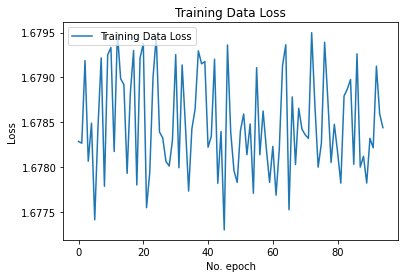

In [ ]:
plt.plot(results_2.history['loss'][5:], label='Training Data Loss')

plt.title('Training Data Loss')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# LSTM Workings_4

n_timesteps = 1

x_train = np.reshape(x_train, (3780, n_timesteps, 1000))
y_train = np.reshape(y_train, (3780, n_timesteps, 1000))

x_train = np.array(x_train)
y_train = np.array(y_train)

model_3 = Sequential()
model_3.add(Bidirectional(LSTM(units=1000, return_sequences = True, input_shape = (n_timesteps, 1000))))
model_3.add(LSTM(1000, return_sequences = True))
model_3.add(Dropout(0.2))

model_3.compile(loss='hinge', optimizer="RMSprop", metrics=['accuracy'])

results_3 = model_3.fit(x_train, y_train, epochs=100, batch_size=32, shuffle=True)

print(model_3.summary())

Epoch 1/100
3780/3780 [==============================] - 6s 2ms/step - loss: 0.3323 - accuracy: 0.0000e+00
Epoch 2/100
3780/3780 [==============================] - 5s 1ms/step - loss: 0.2001 - accuracy: 0.0000e+00
Epoch 3/100
3780/3780 [==============================] - 5s 1ms/step - loss: 0.2002 - accuracy: 0.0000e+00
Epoch 4/100
3780/3780 [==============================] - 5s 1ms/step - loss: 0.2001 - accuracy: 0.0000e+00
Epoch 5/100
3780/3780 [==============================] - 5s 1ms/step - loss: 0.1999 - accuracy: 0.0000e+00
Epoch 6/100
3780/3780 [==============================] - 5s 1ms/step - loss: 0.2000 - accuracy: 0.0000e+00
Epoch 7/100
3780/3780 [==============================] - 5s 1ms/step - loss: 0.2000 - accuracy: 0.0000e+00
Epoch 8/100
3780/3780 [==============================] - 5s 1ms/step - loss: 0.2000 - accuracy: 0.0000e+00
Epoch 9/100
3780/3780 [==============================] - 5s 1ms/step - loss: 0.2002 - accuracy: 0.0000e+00
Epoch 10/100
3780/3780 [=============

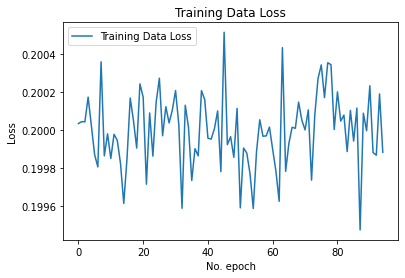

In [ ]:
plt.plot(results_3.history['loss'][5:], label='Training Data Loss')

plt.title('Training Data Loss')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# LSTM Workings_4b

n_timesteps = 1

x_train = np.reshape(x_train, (3780, n_timesteps, 1000))
y_train = np.reshape(y_train, (3780, n_timesteps, 1000))

x_train = np.array(x_train)
y_train = np.array(y_train)

model_3 = Sequential()
model_3.add(Bidirectional(LSTM(units=1000, return_sequences = True, input_shape = (n_timesteps, 1000))))
model_3.add(LSTM(1000, return_sequences = True))
model_3.add(Dropout(0.2))

lr_schedule = LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))

optimizer = SGD(lr=1e-8, momentum=0.9)

model_3.compile(loss='hinge',
              optimizer=optimizer,
              metrics=(["mae"]))

results_3 = model_3.fit(x_train, y_train, epochs=100, batch_size=32, 
                        shuffle=True, callbacks=[lr_schedule])

print(model_3.summary())

Epoch 1/100
3780/3780 [==============================] - 4s 1ms/step - loss: 1.0000 - mae: 1.9998
Epoch 2/100
3780/3780 [==============================] - 4s 940us/step - loss: 1.0000 - mae: 1.9998
Epoch 3/100
3780/3780 [==============================] - 4s 934us/step - loss: 1.0000 - mae: 1.9998
Epoch 4/100
3780/3780 [==============================] - 4s 935us/step - loss: 1.0000 - mae: 1.9998
Epoch 5/100
3780/3780 [==============================] - 3s 922us/step - loss: 1.0000 - mae: 1.9998
Epoch 6/100
3780/3780 [==============================] - 3s 912us/step - loss: 1.0000 - mae: 1.9998
Epoch 7/100
3780/3780 [==============================] - 3s 926us/step - loss: 1.0000 - mae: 1.9998
Epoch 8/100
3780/3780 [==============================] - 3s 920us/step - loss: 1.0000 - mae: 1.9998
Epoch 9/100
3780/3780 [==============================] - 3s 924us/step - loss: 1.0000 - mae: 1.9998
Epoch 10/100
3780/3780 [==============================] - 4s 938us/step - loss: 1.0000 - mae: 1.9998
E

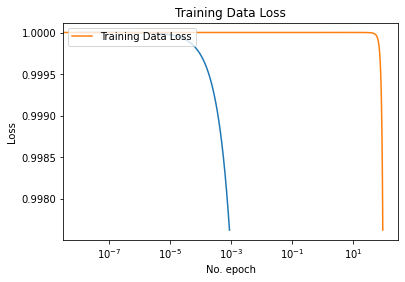

In [ ]:
plt.semilogx(results_3.history["lr"], results_3.history["loss"])

plt.plot(results_3.history['loss'][5:], label='Training Data Loss')

plt.title('Training Data Loss')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()


In [ ]:
# LSTM Workings_4c

n_timesteps = 1

x_train = np.reshape(x_train, (3780, n_timesteps, 1000))
x_valid = np.reshape(x_valid, (3780, n_timesteps, 1000))
y_train = np.reshape(y_train, (3780, n_timesteps, 1000))
y_valid = np.reshape(y_valid, (3780, n_timesteps, 1000))

x_train = np.array(x_train)
y_train = np.array(y_train)
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)

model_4 = Sequential()
model_4.add(Bidirectional(LSTM(units=1000, return_sequences = True, 
                               input_shape = (n_timesteps, 1000))))
model_4.add(LSTM(1000, return_sequences = True))
model_4.add(Dropout(0.2))

model_4.compile(loss='squared_hinge', optimizer="RMSprop",
              metrics=(["mse", 'accuracy']), verbose=1)

results_4 = model_4.fit(x_train, y_train, epochs=100, batch_size=32, 
                        shuffle=True, validation_data=(x_valid, y_valid))

overall_mse = sum(results_4.history['mse']) / len(results_4.history['mse'])
sqrt_mse = overall_mse**0.5
print('Overall MSE =  {}'.format(overall_mse))
print('Overall RMSE =  {}'.format(sqrt_mse))

print(model_4.summary())

Train on 3780 samples, validate on 3780 samples
Epoch 1/100
3780/3780 [==============================] - 7s 2ms/step - loss: 0.3078 - mse: 2.8003 - accuracy: 0.0000e+00 - val_loss: 0.0117 - val_mse: 2.4092 - val_accuracy: 0.0000e+00
Epoch 2/100
3780/3780 [==============================] - 6s 2ms/step - loss: 0.2002 - mse: 2.3565 - accuracy: 0.0000e+00 - val_loss: 3.1983e-05 - val_mse: 2.0578 - val_accuracy: 0.0000e+00
Epoch 3/100
3780/3780 [==============================] - 6s 2ms/step - loss: 0.2001 - mse: 1.9577 - accuracy: 0.0000e+00 - val_loss: 1.7303e-05 - val_mse: 1.7416 - val_accuracy: 0.0000e+00
Epoch 4/100
3780/3780 [==============================] - 6s 2ms/step - loss: 0.1998 - mse: 1.8162 - accuracy: 0.0000e+00 - val_loss: 1.4266e-05 - val_mse: 1.6649 - val_accuracy: 0.0000e+00
Epoch 5/100
3780/3780 [==============================] - 6s 1ms/step - loss: 0.2003 - mse: 1.7749 - accuracy: 0.0000e+00 - val_loss: 1.3025e-05 - val_mse: 1.6318 - val_accuracy: 0.0000e+00
Epoch 6/100

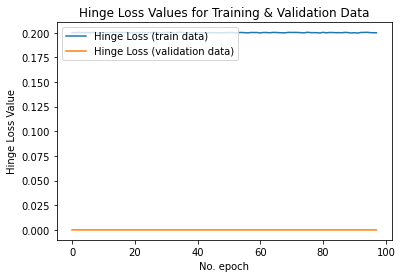

In [ ]:
plt.plot(results_4.history['loss'][2:], label='Hinge Loss (train data)')
plt.plot(results_4.history['val_loss'][2:], label='Hinge Loss (validation data)')
plt.title('Hinge Loss Values for Training & Validation Data')
plt.ylabel('Hinge Loss Value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

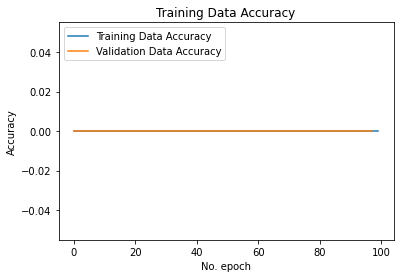

In [ ]:
plt.plot(results_4.history['accuracy'][2:], label='Training Data Accuracy')
plt.plot(results_4.history['val_accuracy'][2:], label='Validation Data Accuracy')
plt.title('Training Data Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# LSTM Workings_5

n_timesteps = 1

x_train = np.reshape(x_train, (3780, n_timesteps, 1000))
x_valid = np.reshape(x_valid, (3780, n_timesteps, 1000))
y_train = np.reshape(y_train, (3780, n_timesteps, 1000))
y_valid = np.reshape(y_valid, (3780, n_timesteps, 1000))

x_train = np.array(x_train)
y_train = np.array(y_train)
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)

model_5 = Sequential()
model_5.add(Bidirectional(LSTM(units=1000, return_sequences = True, 
                               input_shape = (n_timesteps, 1000))))
model_5.add(LSTM(1000, return_sequences = True))
model_5.add(Dropout(0.2))

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer="RMSprop",
              metrics=(["mse", 'accuracy']), verbose=1)

results_5 = model_5.fit(x_train, y_train, epochs=100, batch_size=32, 
                        shuffle=True, validation_data=(x_valid, y_valid))

overall_mse = sum(results_5.history['mse']) / len(results_5.history['mse'])
sqrt_mse = overall_mse**0.5

print()
print('Overall MSE =  {}'.format(overall_mse))
print('Overall RMSE =  {}'.format(sqrt_mse))

print(model_5.summary())

Train on 3780 samples, validate on 3780 samples
Epoch 1/100
3780/3780 [==============================] - 7s 2ms/step - loss: 8.3095 - mse: 2.8792 - accuracy: 0.0000e+00 - val_loss: -0.8213 - val_mse: 1.5585 - val_accuracy: 0.0000e+00
Epoch 2/100
3780/3780 [==============================] - 6s 2ms/step - loss: 3.8606 - mse: 1.6823 - accuracy: 2.6455e-04 - val_loss: -0.8888 - val_mse: 1.5334 - val_accuracy: 0.0000e+00
Epoch 3/100
3780/3780 [==============================] - 6s 2ms/step - loss: 3.8398 - mse: 1.6802 - accuracy: 0.1852 - val_loss: -0.8889 - val_mse: 1.5334 - val_accuracy: 0.7307
Epoch 4/100
3780/3780 [==============================] - 6s 2ms/step - loss: 3.8225 - mse: 1.6787 - accuracy: 0.7587 - val_loss: -0.8889 - val_mse: 1.5334 - val_accuracy: 0.9630
Epoch 5/100
3780/3780 [==============================] - 6s 2ms/step - loss: 3.8145 - mse: 1.6780 - accuracy: 0.8061 - val_loss: -0.8889 - val_mse: 1.5334 - val_accuracy: 0.9865
Epoch 6/100
3780/3780 [=======================

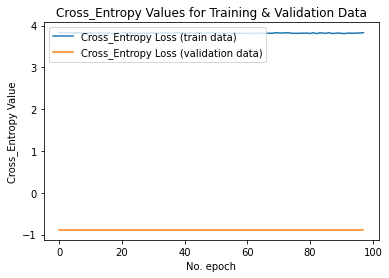

In [ ]:
plt.plot(results_5.history['loss'][2:], label='Cross_Entropy Loss (train data)')
plt.plot(results_5.history['val_loss'][2:], label='Cross_Entropy Loss (validation data)')
plt.title('Cross_Entropy Values for Training & Validation Data')
plt.ylabel('Cross_Entropy Value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

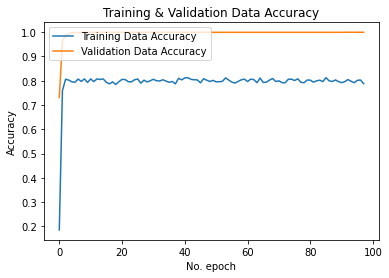

In [ ]:
plt.plot(results_5.history['accuracy'][2:], label='Training Data Accuracy')
plt.plot(results_5.history['val_accuracy'][2:], label='Validation Data Accuracy')
plt.title('Training & Validation Data Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()